In [2]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape = ', x_train.shape, ' , x_test.shape = ', x_test.shape)
print('t_train.shape = ', t_train.shape, ' , t_test.shape = ', t_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train.shape =  (60000, 28, 28)  , x_test.shape =  (10000, 28, 28)
t_train.shape =  (60000,)  , t_test.shape =  (10000,)


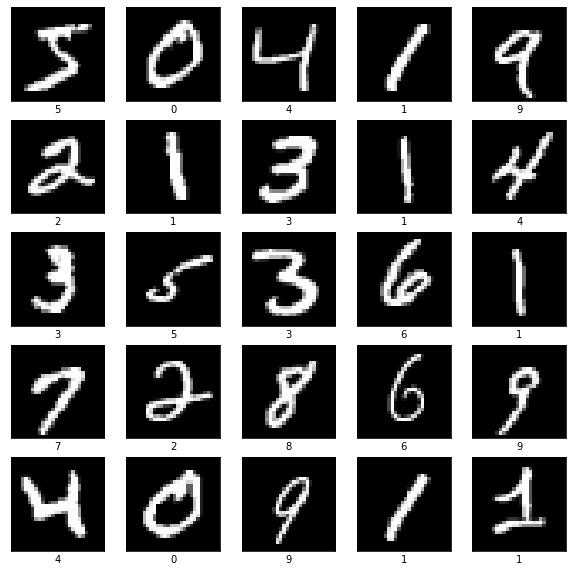

In [4]:
# 데이터 출력

plt.figure(figsize=(10,10))

for index in range(25):

    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], cmap='gray')
    plt.xlabel(str(t_train[index]))

plt.show()

In [5]:
model = Sequential()

model.add(Conv2D(input_shape=(28,28,1), 
                 kernel_size=3, filters=32, 
                 strides=(1,1), activation='relu', padding='SAME'))

model.add(MaxPool2D(pool_size=(2,2), padding='SAME'))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [6]:
# model compile
# one hot encoding 방식이 아니기 때문에, loss=sparse_categorical_crossentropy 정의

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


In [7]:
start_time = datetime.now()

hist = model.fit(x_train.reshape(-1,28,28,1), t_train, 
                 batch_size=50, epochs=50, validation_split=0.2)

end_time = datetime.now()

print('\n\nElapsed Time => ', end_time - start_time)

Epoch 1/50
960/960 [==============================] - 37s 5ms/step - loss: 0.2915 - accuracy: 0.9171 - val_loss: 0.1260 - val_accuracy: 0.9668
Epoch 2/50
960/960 [==============================] - 4s 5ms/step - loss: 0.1020 - accuracy: 0.9705 - val_loss: 0.0864 - val_accuracy: 0.9762
Epoch 3/50
960/960 [==============================] - 4s 5ms/step - loss: 0.0732 - accuracy: 0.9789 - val_loss: 0.0861 - val_accuracy: 0.9769
Epoch 4/50
960/960 [==============================] - 5s 5ms/step - loss: 0.0602 - accuracy: 0.9825 - val_loss: 0.0712 - val_accuracy: 0.9802
Epoch 5/50
960/960 [==============================] - 5s 5ms/step - loss: 0.0500 - accuracy: 0.9854 - val_loss: 0.0686 - val_accuracy: 0.9796
Epoch 6/50
960/960 [==============================] - 4s 4ms/step - loss: 0.0442 - accuracy: 0.9865 - val_loss: 0.0679 - val_accuracy: 0.9797
Epoch 7/50
960/960 [==============================] - 4s 4ms/step - loss: 0.0386 - accuracy: 0.9881 - val_loss: 0.0671 - val_accuracy: 0.9808
Epoch

In [8]:
model.evaluate(x_test.reshape(-1,28,28,1), t_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1052 - accuracy: 0.9839


[0.10515271127223969, 0.9839000105857849]

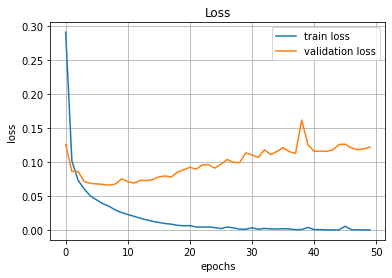

In [9]:
plt.title('Loss')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

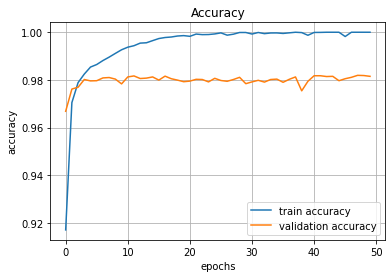

In [10]:
plt.title('Accuracy')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

In [15]:
rand_idx = np.random.randint(len(x_test))

print(rand_idx)

predicted_val = model.predict(x_test[rand_idx].reshape(-1,28,28,1))

print(type(predicted_val), predicted_val.shape)

print(predicted_val)

print(np.argmax(predicted_val), t_test[rand_idx])

3168
<class 'numpy.ndarray'> (1, 10)
[[2.9477740e-31 1.0732472e-25 1.2657751e-20 3.5341849e-13 1.3210143e-16
  1.9856330e-19 1.2783073e-30 2.5408397e-16 5.2557976e-16 1.0000000e+00]]
9 9
